# **Proyek Sentimen Analisis: Roblox**
- **Nama:** Abisatya Hastarangga Pradana
- **Email:** riabitya@gmail.com
- **ID Dicoding:** abisatya_19

##**Importing Dependencies**

In [1]:
!pip install emoji
!pip install Sastrawi
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')
nltk_download('punkt_tab')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import requests
import csv
from io import StringIO
import tensorflow as tf
import emoji
from google.colab import drive
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


##**Memuat Dataset**
Melakukan read dataset dan menyimpannya di variabel data.

In [3]:
#memuat dataset
data = pd.read_csv('/content/drive/My Drive/NLP/reviews_roblox.csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8b915087-5446-4b23-a65f-cc14ab94ece9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sm aku suka bisa mabar sm temen trus map...,5,0,2.663.659,2025-03-13 13:23:34,NaN,NaN,2.663.659
1,c966d546-390f-476f-bc8f-7eb87204d247,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya suka game ini karena bagus dan gak boseni...,5,2,2.662.537,2025-03-13 13:23:28,NaN,NaN,2.662.537
2,37494423-ec79-475d-84fc-e46f8f462191,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus banget,5,0,NaN,2025-03-13 13:21:20,NaN,NaN,NaN
3,a7b9dd81-6df6-460f-8a69-a9e000ddbd6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"jan upgrade mulu pls, males nungguin download ...",3,0,2.663.659,2025-03-13 13:21:02,NaN,NaN,2.663.659
4,a0ae5b9c-d333-4b5a-8227-7ba3206be8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Permainan nya bagus bgt dan seru sekali, kita ...",5,0,2.663.660,2025-03-13 13:20:36,NaN,NaN,2.663.660


Menampilkan informasi dari dataset seperti jumlah baris, kolom, dan tipe data.

In [4]:
#Menampilkan informasi dataset
print("Jumlah baris dan kolom:")
print(data.shape)

print("\nInformasi kolom:")
print(data.info())

Jumlah baris dan kolom:
(20000, 11)

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              20000 non-null  object 
 1   userName              20000 non-null  object 
 2   userImage             20000 non-null  object 
 3   content               19996 non-null  object 
 4   score                 20000 non-null  int64  
 5   thumbsUpCount         20000 non-null  int64  
 6   reviewCreatedVersion  14735 non-null  object 
 7   at                    20000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            14735 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB
None


In [5]:
# Cek nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
print(data.isnull().sum())


Jumlah nilai yang hilang per kolom:
reviewId                    0
userName                    0
userImage                   0
content                     4
score                       0
thumbsUpCount               0
reviewCreatedVersion     5265
at                          0
replyContent            20000
repliedAt               20000
appVersion               5265
dtype: int64


In [6]:
# Cek distribusi rating
print("\nDistribusi rating:")
print(data['score'].value_counts())


Distribusi rating:
score
5    14005
4     2443
1     1825
3     1107
2      620
Name: count, dtype: int64


##**Data Preprocessing**

### Hapus Kolom Tidak Relevan

Kolom berikut tidak relevan untuk analisis sentimen:

* `reviewId`, `userName`, `userImage` → Tidak memiliki informasi untuk model
* `replyContent`, `repliedAt` → Semua nilainya NaN, jadi bisa dihapus

In [7]:
clean_data = data.drop(columns=['reviewId', 'userName', 'userImage', 'replyContent', 'repliedAt'])
clean_data.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,Bagus sm aku suka bisa mabar sm temen trus map...,5,0,2.663.659,2025-03-13 13:23:34,2.663.659
1,Saya suka game ini karena bagus dan gak boseni...,5,2,2.662.537,2025-03-13 13:23:28,2.662.537
2,Bagus banget,5,0,NaN,2025-03-13 13:21:20,NaN
3,"jan upgrade mulu pls, males nungguin download ...",3,0,2.663.659,2025-03-13 13:21:02,2.663.659
4,"Permainan nya bagus bgt dan seru sekali, kita ...",5,0,2.663.660,2025-03-13 13:20:36,2.663.660


#### Missing Values

In [8]:
clean_data.dropna(subset=['content'], inplace=True)  # Hapus review yang kosong
clean_data['reviewCreatedVersion'].fillna("Unknown", inplace=True)
clean_data['appVersion'].fillna("Unknown", inplace=True)

In [9]:
print("\nJumlah nilai yang hilang per kolom:")
print(clean_data.isnull().sum())


Jumlah nilai yang hilang per kolom:
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64


####Duplicates Data

In [10]:
clean_data = clean_data.drop_duplicates()

In [11]:
print("Jumlah nilai yang duplikasi:")
print(clean_data.duplicated().sum())

Jumlah nilai yang duplikasi:
0


Menampilkan kembali info dari dataset setelah dilakukan cleaning.

In [12]:
# Menampilkan info dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               19995 non-null  object
 1   score                 19995 non-null  int64 
 2   thumbsUpCount         19995 non-null  int64 
 3   reviewCreatedVersion  19995 non-null  object
 4   at                    19995 non-null  object
 5   appVersion            19995 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


#### Text Cleaning

Mendefinisikan fungsi-fungsi untuk preprocessing text.

* clean_text: fungsi untuk menghapus mentions, hastag, RT, link, dan numbers dari text.
* case_folding_text: fungsi untuk mengubah text menjadi lowercase.
* tokenizing_text: fungsi untuk memecah text menjadi list tokens.
* filtering_text: fungsi untuk menghapus stopwords dalam bahasa Indonesia ataupun Inggris.
* stemming_text: fungsi untuk mengubah text menjadi bentuk dasar. Namun pada proyek ini tidak akan digunakan karena proses nya yang lama.
* to_sentence: fungsi untuk menggabungkan kembali text yang sebelumnya dipecah menjadi token.
* fix_slangwords: fungsi untuk mengubah slangwords menjadi bentuk baku.

In [13]:
def clean_text(text):
    text = re.sub(r'[0-9]+', '', text) # menghilangkan angka
    text = re.sub(r'[^\w\s]', '', text) # menghilangkan angka
    text = re.sub(r'http\S+|www\S+', '', text)  # menghilangkan URLs
    text = text.replace('\n', ' ') # mengganti new line menjadi space
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # menghilangkan special characters
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghilangkan punctuation
    text = text.strip()  # menghilangkan whitespace
    text = emoji.demojize(text)  # Mengubah emoticons ke text
    return text

def case_folding_text(text):
    text = text.lower()
    return text

def tokenizing_text(text):
    text = word_tokenize(text)
    return text

def filtering_text(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemming_text(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def to_sentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "sm": "sama", "bs": "bisa"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [14]:
# Menampilkan dataset yang belum dibersihkan
clean_df = clean_data
clean_df.head(1)

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,Bagus sm aku suka bisa mabar sm temen trus map...,5,0,2.663.659,2025-03-13 13:23:34,2.663.659


Menerapkan preprocessing text

In [15]:
# Membersihkan teks
clean_df['content'] = clean_df['content'].apply(clean_text)

# Mengubah huruf dalam teks menjadi huruf kecil
clean_df['content'] = clean_df['content'].apply(case_folding_text)

# Mengganti kata-kata slang dengan kata-kata standar
clean_df['content'] = clean_df['content'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata)
clean_df['content'] = clean_df['content'].apply(tokenizing_text)

# Menghapus kata-kata stop (kata-kata umum)
clean_df['content'] = clean_df['content'].apply(filtering_text)

# Menggabungkan token-token menjadi kalimat
clean_df['content'] = clean_df['content'].apply(to_sentence)

In [16]:
# Menampilkan dataset setelah preprocessing text
clean_df.head(1)

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,bagus suka mabar teman trus map ny banget mark...,5,0,2.663.659,2025-03-13 13:23:34,2.663.659


####Labeling Sentiment

In [17]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        polarity = 'positive'
    elif score <= -0.05:
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return pd.Series([score, polarity])

clean_df[['polarity_score', 'polarity']] = clean_df['content'].apply(lambda x: pd.Series(vader_sentiment(x)))
print(clean_df['polarity'].value_counts())

polarity
neutral     17359
positive     1645
negative      991
Name: count, dtype: int64


In [18]:
clean_df.head(10)

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,polarity_score,polarity
0,bagus suka mabar teman trus map ny banget mark...,5,0,2.663.659,2025-03-13 13:23:34,2.663.659,0.2023,positive
1,suka game bagus bosenin gamenya,5,2,2.662.537,2025-03-13 13:23:28,2.662.537,0.0000,neutral
2,bagus banget,5,0,Unknown,2025-03-13 13:21:20,Unknown,0.0000,neutral
3,jan upgrade melulu tolong males nungguin downl...,3,0,2.663.659,2025-03-13 13:21:02,2.663.659,0.0000,neutral
4,permainan bagus banget seru dapatin teman online,5,0,2.663.660,2025-03-13 13:20:36,2.663.660,0.0000,neutral
5,bagus seru cuman ngeleg,5,0,2.663.660,2025-03-13 13:20:29,2.663.660,0.0000,neutral
6,bagus,1,0,Unknown,2025-03-13 13:20:28,Unknown,0.0000,neutral
7,game asw,1,0,2.663.660,2025-03-13 13:20:25,2.663.660,0.0000,neutral
8,sure menyenangkan,5,0,2.662.537,2025-03-13 13:20:15,2.662.537,0.3182,positive
9,best,5,0,2.662.537,2025-03-13 13:19:18,2.662.537,0.6369,positive


##**Data understanding**

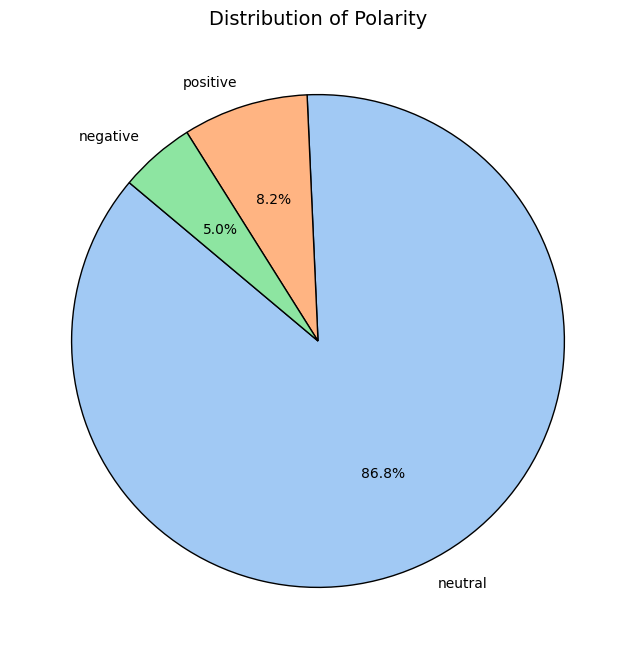

In [19]:
# Menampilkan diagram lingkaran untuk memudahkan visualisasi pembagian dataset.
polarity_counts = clean_df['polarity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Polarity', fontsize=14)
plt.show()

In [20]:
clean_df.head(10)

,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,polarity_score,polarity
0,bagus suka mabar teman trus map ny banget mark...,5,0,2.663.659,2025-03-13 13:23:34,2.663.659,0.2023,positive
1,suka game bagus bosenin gamenya,5,2,2.662.537,2025-03-13 13:23:28,2.662.537,0.0000,neutral
2,bagus banget,5,0,Unknown,2025-03-13 13:21:20,Unknown,0.0000,neutral
3,jan upgrade melulu tolong males nungguin downl...,3,0,2.663.659,2025-03-13 13:21:02,2.663.659,0.0000,neutral
4,permainan bagus banget seru dapatin teman online,5,0,2.663.660,2025-03-13 13:20:36,2.663.660,0.0000,neutral
5,bagus seru cuman ngeleg,5,0,2.663.660,2025-03-13 13:20:29,2.663.660,0.0000,neutral
6,bagus,1,0,Unknown,2025-03-13 13:20:28,Unknown,0.0000,neutral
7,game asw,1,0,2.663.660,2025-03-13 13:20:25,2.663.660,0.0000,neutral
8,sure menyenangkan,5,0,2.662.537,2025-03-13 13:20:15,2.662.537,0.3182,positive
9,best,5,0,2.662.537,2025-03-13 13:19:18,2.662.537,0.6369,positive


####WordCloud Positif

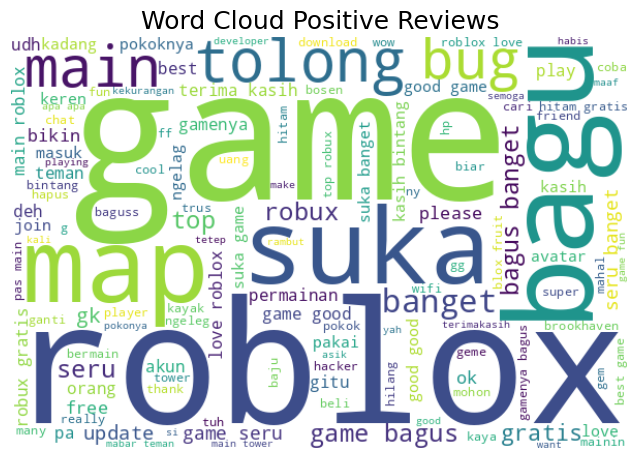

In [21]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_reviews = clean_df[clean_df['polarity'] == 'positive'].copy()
positive_reviews = positive_reviews[['content', 'polarity_score', 'polarity']]
positive_reviews = positive_reviews.sort_values(by='polarity_score', ascending=False)
positive_reviews = positive_reviews.reset_index(drop=True)
positive_reviews.index += 1

#visualisasi wordcloud
list_words = ' '.join(positive_reviews['content'])  # Gabungkan semua teks menjadi satu string
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud Positive Reviews', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.show()

####Wordcloud Neutral

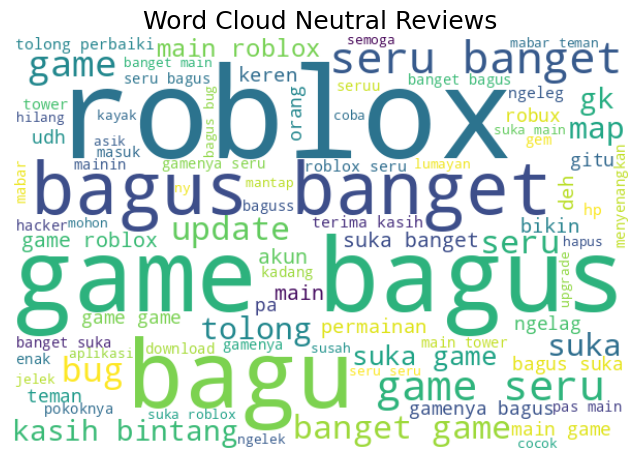

In [22]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_reviews = clean_df[clean_df['polarity'] == 'neutral'].copy()
neutral_reviews = neutral_reviews[['content', 'polarity_score', 'polarity']]
neutral_reviews = neutral_reviews.sort_values(by='polarity_score', ascending=False)
neutral_reviews = neutral_reviews.reset_index(drop=True)
neutral_reviews.index += 1

#visualisasi wordcloud
list_words = ' '.join(neutral_reviews['content'])  # Gabungkan semua teks menjadi satu string
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud Neutral Reviews', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.show()

####Wordcloud Negative


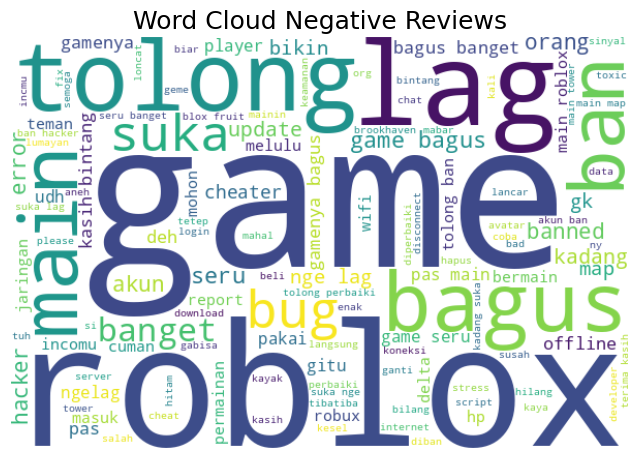

In [23]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_reviews = clean_df[clean_df['polarity'] == 'negative'].copy()
negative_reviews = negative_reviews[['content', 'polarity_score', 'polarity']]
negative_reviews = negative_reviews.sort_values(by='polarity_score', ascending=False)
negative_reviews = negative_reviews.reset_index(drop=True)
negative_reviews.index += 1

#visualisasi wordcloud
list_words = ' '.join(negative_reviews['content'])  # Gabungkan semua teks menjadi satu string
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud Negative Reviews', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.show()

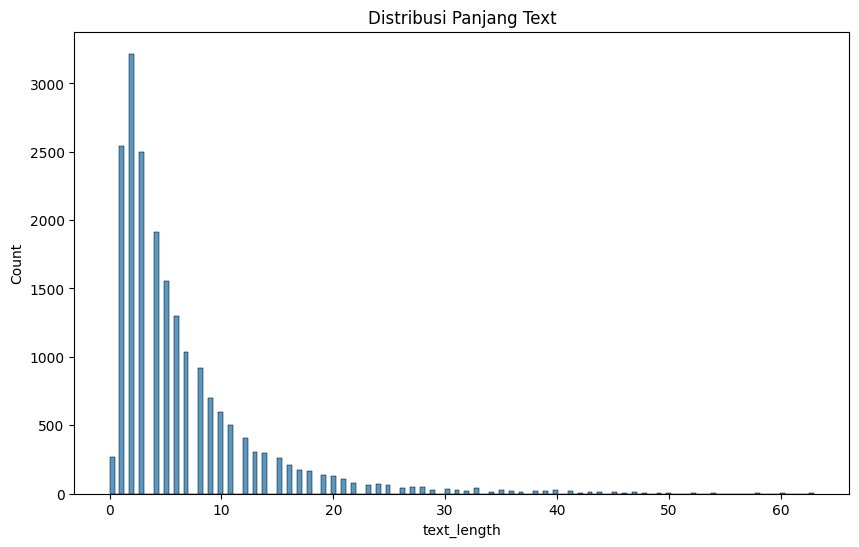

In [24]:
data_clean_copy = clean_df.copy()
plt.figure(figsize=(10, 6))

# Visualisasi distribusi text
data_clean_copy['text_length'] = data_clean_copy['content'].apply(lambda x: len(x.split()))
sns.histplot(data_clean_copy['text_length'])
plt.title('Distribusi Panjang Text')
plt.show()

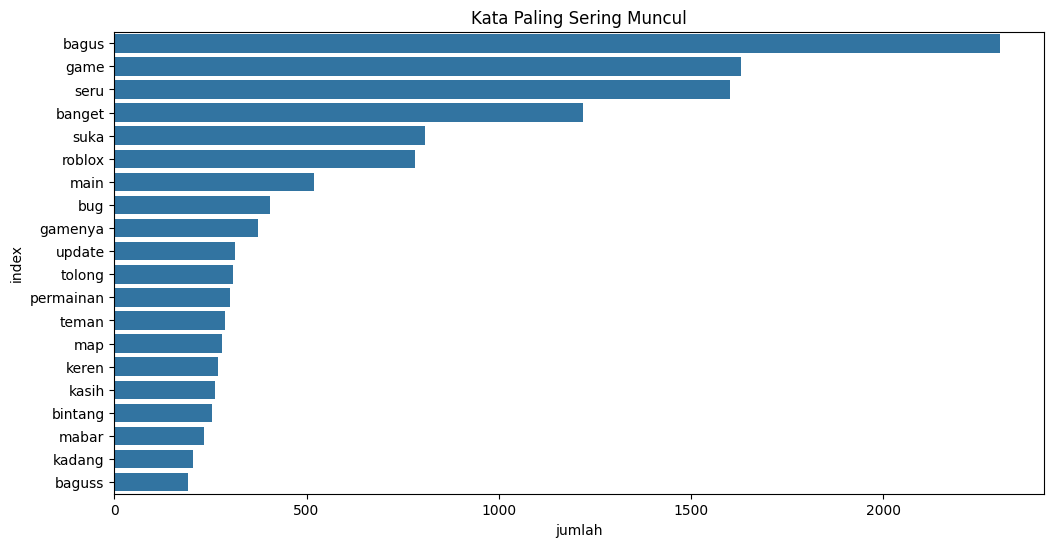

In [25]:
plt.figure(figsize=(12, 6))

# Visualisasi kata yang paling sering muncul
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_clean_copy['content'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Paling Sering Muncul')
plt.show()

##**Modeling**

Pembuatan model dengan melakukan tiga percobaan skema pelatihan yang berbeda dan dibedakan dengan variasi dari dua kombinasi seperti berikut:

* Model 1
  * Algoritma Pelatihan: LSTM
  * Pembagian Data: Training 70, val 20, test 10

* Model 2
  * Algoritma Pelatihan: CNN
  * Pembagian Data: Training 80, val 10, test 10

* Model 3
  * Algoritma Pelatihan: GRU
  * Pembagian Data: Training 75, val 15, test 5


Kolom `content` dijadikan sebagai fitur dan kolom `polarity` dijadikan sebagai target.


In [26]:
# Mengambil kolom content dan polarity
X = clean_df['content']
y = clean_df['polarity']

In [27]:
# Tokenisasi
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

In [28]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.93:
            print(f"\nVal accuracy telah melebihi 0.93, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True
early_stopping = CustomCallback()

#### Model 1-LSTM

In [29]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [30]:
# Membangun model LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_LSTM, y_val_LSTM))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
7/7 - 19s - 3s/step - accuracy: 0.7947 - loss: 5.4743 - val_accuracy: 0.8725 - val_loss: 4.6105
Epoch 2/50
7/7 - 3s - 393ms/step - accuracy: 0.8660 - loss: 4.2913 - val_accuracy: 0.8725 - val_loss: 3.7858
Epoch 3/50
7/7 - 5s - 749ms/step - accuracy: 0.8660 - loss: 3.4991 - val_accuracy: 0.8725 - val_loss: 3.0857
Epoch 4/50
7/7 - 5s - 740ms/step - accuracy: 0.8660 - loss: 2.8485 - val_accuracy: 0.8725 - val_loss: 2.5095
Epoch 5/50
7/7 - 5s - 720ms/step - accuracy: 0.8660 - loss: 2.3224 - val_accuracy: 0.8725 - val_loss: 2.0475
Epoch 6/50
7/7 - 6s - 908ms/step - accuracy: 0.8660 - loss: 1.9035 - val_accuracy: 0.8725 - val_loss: 1.6792
Epoch 7/50
7/7 - 4s - 512ms/step - accuracy: 0.8660 - loss: 1.5698 - val_accuracy: 0.8725 - val_loss: 1.3914
Epoch 8/50
7/7 - 5s - 763ms/step - accuracy: 0.8660 - loss: 1.3090 - val_accuracy: 0.8725 - val_loss: 1.1654
Epoch 9/50
7/7 - 5s - 702ms/step - accuracy: 0.8660 - loss: 1.1047 - val_accuracy: 0.8725 - val_loss: 0.9893
Epoch 10/50
7/7 - 5s 

In [31]:
# Evaluasi model
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % (score_LSTM))
print("Test accuracy: %.2f" % (acc_LSTM))

63/63 - 5s - 72ms/step - accuracy: 0.9295 - loss: 0.2980
Test score: 0.30
Test accuracy: 0.93


In [32]:
model_LSTM.save('model_LSTM.h5')

####Model 2 - CNN

In [33]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

In [34]:
# Membangun model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 2056
history_CNN = model_CNN.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_CNN, y_val_CNN))

Epoch 1/50
8/8 - 12s - 2s/step - accuracy: 0.7791 - loss: 0.6725 - val_accuracy: 0.8830 - val_loss: 0.5100
Epoch 2/50
8/8 - 10s - 1s/step - accuracy: 0.8655 - loss: 0.5095 - val_accuracy: 0.8830 - val_loss: 0.4205
Epoch 3/50
8/8 - 1s - 67ms/step - accuracy: 0.8656 - loss: 0.4726 - val_accuracy: 0.8830 - val_loss: 0.3938
Epoch 4/50
8/8 - 1s - 78ms/step - accuracy: 0.8664 - loss: 0.4549 - val_accuracy: 0.8840 - val_loss: 0.3803
Epoch 5/50
8/8 - 0s - 60ms/step - accuracy: 0.8695 - loss: 0.4207 - val_accuracy: 0.8890 - val_loss: 0.3408
Epoch 6/50
8/8 - 0s - 61ms/step - accuracy: 0.8801 - loss: 0.3522 - val_accuracy: 0.9090 - val_loss: 0.2555
Epoch 7/50

Val accuracy telah melebihi 0.93, menghentikan pelatihan pada epoch 7
8/8 - 1s - 63ms/step - accuracy: 0.9108 - loss: 0.2522 - val_accuracy: 0.9430 - val_loss: 0.1813


In [35]:
# Evaluasi model
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2,batch_size=1028)
print("Test score: %.2f" % (score_CNN))
print("Test accuracy: %.2f" % (acc_CNN))

2/2 - 1s - 587ms/step - accuracy: 0.9355 - loss: 0.2018
Test score: 0.20
Test accuracy: 0.94


In [36]:
model_CNN.save('model_CNN.h5')

####Model 3 - GRU

In [37]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=15/95, random_state=42)

In [38]:
# Membangun model GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.2))
model_GRU.add(Bidirectional(GRU(128, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(64, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu', kernel_regularizer=l2(0.005)))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(num_classes, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.0005), metrics=['accuracy'])


# Melatih model dengan early stopping kustom
batch_size = 1028
history_GRU = model_GRU.fit(X_train_GRU, y_train_GRU, epochs=20, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU),callbacks=[early_stopping])

Epoch 1/20
16/16 - 8s - 485ms/step - accuracy: 0.8356 - loss: 1.6437 - val_accuracy: 0.8727 - val_loss: 1.3807
Epoch 2/20
16/16 - 5s - 283ms/step - accuracy: 0.8663 - loss: 1.3678 - val_accuracy: 0.8727 - val_loss: 1.2501
Epoch 3/20
16/16 - 2s - 132ms/step - accuracy: 0.8682 - loss: 1.2134 - val_accuracy: 0.8777 - val_loss: 1.0888
Epoch 4/20
16/16 - 3s - 169ms/step - accuracy: 0.8994 - loss: 1.0093 - val_accuracy: 0.9157 - val_loss: 0.9133
Epoch 5/20
16/16 - 3s - 159ms/step - accuracy: 0.9299 - loss: 0.8292 - val_accuracy: 0.9267 - val_loss: 0.7814
Epoch 6/20

Val accuracy telah melebihi 0.93, menghentikan pelatihan pada epoch 6
16/16 - 2s - 145ms/step - accuracy: 0.9369 - loss: 0.7090 - val_accuracy: 0.9340 - val_loss: 0.6786


In [39]:
# Evaluasi model
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test score: %.2f" % (score_GRU))
print("Test accuracy: %.2f" % (acc_GRU))

32/32 - 0s - 11ms/step - accuracy: 0.9460 - loss: 0.6762
Test score: 0.68
Test accuracy: 0.95


In [40]:
# Menyimpan model
model_GRU.save('model_GRU.h5')

##**Evaluasi Model**

In [41]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Accuracy Train': [history_LSTM.history['accuracy'][-1], history_CNN.history['accuracy'][-1],history_GRU.history['accuracy'][-1]],
    'Accuracy Test': [acc_LSTM, acc_CNN,acc_GRU]
})
results_df

,Model,Accuracy Train,Accuracy Test
0,LSTM,0.931195,0.9295
1,CNN,0.910847,0.9355
2,GRU,0.936855,0.9460


##**Prediksi**

In [42]:
new_texts = [
    "bagus suka mabar teman trus map ny banget marketplace gratisin dongg kmrin watching top g sd duitt",
    "roblox lumayan sih, fitur-fitur kayak buat game sendiri menarik, tapi butuh waktu buat belajar. overall oke, tapi nggak ada yang spesial banget.",
    "akun ban user name devic ban salah gameee burikkk lag lag kalau maiin game apaan ini!!!! bermain stuck loading server	 emosi	"
]

# Nilai asli dari teks
true_labels = ["positive", "neutral", "negative"]

# Tokenisasi teks baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_CNN = model_CNN.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi menjadi label
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_CNN = np.argmax(predictions_CNN, axis=1)
predicted_labels_GRU = np.argmax(predictions_GRU, axis=1)

predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, predicted_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Text: bagus suka mabar teman trus map ny banget marketplace gratisin dongg kmrin watching top g sd duitt
True Label: positive
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): positive

Text: roblox lumayan sih, fitur-fitur kayak buat game sendiri menarik, tapi butuh waktu buat belajar. overall oke, tapi nggak ada yang spesial banget.
True Label: neutral
Predicted Label (LSTM): neutral
Predicted Label (CNN): neutral
Predicted Label (GRU): neutral

Text: akun ban user name devic ban salah gameee burikkk lag lag kalau maiin game apaan ini!!!! bermain stuck loading server	 emosi	
True Label: negative
Predicted Label (LSTM): positive
Predicted Label (CNN): negative
Predicted Label (GRU): positive



##**Kesimpulan**

Dalam proyek ini, saya telah membangun dan mengevaluasi tiga model deep learning—LSTM, CNN, dan GRU—untuk analisis sentimen pada dataset review aplikasi roblox dari playstore. Dari hasil evaluasi, CNN menunjukkan performa terbaik dengan akurasi uji sebesar **94.60%**, diikuti oleh GRU dengan **94.40%**, dan LSTM dengan **92.95%**. Model CNN juga lebih akurat dalam mengklasifikasikan sentimen negatif dibandingkan model lainnya, sementara LSTM dan GRU terkadang salah mengklasifikasikan sentimen negatif sebagai positif.  


---

###**Hasil Prediksi dan Saran**

Kesalahan klasifikasi yang terjadi, terutama pada sentimen negatif, mengindikasikan bahwa model masih perlu diperbaiki. Salah satu penyebabnya bisa jadi adalah distribusi data yang tidak seimbang atau kurangnya pemahaman model terhadap kata-kata informal. Untuk meningkatkan performa, beberapa strategi yang dapat diterapkan di masa depan adalah

> **menyeimbangkan dataset dengan SMOTE atau undersampling, menggunakan pretrained word embeddings seperti GloVe atau FastText, serta menerapkan Attention Mechanism agar model lebih fokus pada kata-kata penting dalam teks**.

Selain itu, eksperimen dengan optimizer lain seperti
>**RMSprop** atau pendekatan **ensemble learning** juga bisa dilakukan untuk meningkatkan stabilitas model.  

Dengan hasil ini, saya menyimpulkan bahwa CNN merupakan model yang paling andal untuk tugas analisis sentimen dalam proyek ini. Namun, masih terdapat ruang untuk perbaikan guna memastikan model lebih robust dalam memahami berbagai jenis teks, terutama dalam mendeteksi sentimen negatif. Pengembangan lebih lanjut akan difokuskan pada peningkatan kualitas data, optimasi arsitektur model, serta eksplorasi teknik NLP yang lebih canggih agar hasil prediksi semakin akurat dan dapat digunakan secara luas dalam analisis sentimen berbasis teks.